In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import sys
sys.path.append('../')
import gp

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
e_p = []
p = []

In [3]:
import cPickle as pickle
with open('../nets/IPMLB_FULL.p', 'rb') as f:
    cnn = pickle.load(f)
cnn.uuid = 'IPMLB'

In [4]:
# here we just load p, and e_p

with open('/home/d/data/CYLPATCHES/e_p.p', 'rb') as f:
    e_p = pickle.load(f)
    
with open('/home/d/data/CYLPATCHES/p.p', 'rb') as f:
    p = pickle.load(f)




In [5]:
# cconvert to FP format with target
import neuroproof
import neuroproof.FocusedProofreading as fp


In [6]:
graphs = []
for z in range(250,299):
    
    g = fp.Graph('/home/d/FP/cylinder/graph_'+str(z)+'.json')
    graphs.append(g)

In [8]:
fp_y_test_proba = []
fp_y_test = []
gt_y_test = []
for z in range(49):
    
    cur_e_p = e_p[z]
    cur_p = p[z]
    
    g = graphs[z]
    
    for pa in cur_e_p:
#         print pa['l'], pa['n']
        
        label1 = pa['l']
        label2 = pa['n']

        graph_neighbors = sorted(g.find_close_bodies(label1,0,0.))

        pred = [ne[1] for ne in graph_neighbors if ne[0] == label2]
        
        fp_y_test.append(np.round(pred))
        fp_y_test_proba.append(pred)
        gt_y_test.append(1)
        
    for pa in cur_p:
#         print pa['l'], pa['n']
        
        label1 = pa['l']
        label2 = pa['n']

        graph_neighbors = sorted(g.find_close_bodies(label1,0,0.))

        pred = [ne[1] for ne in graph_neighbors if ne[0] == label2]
        
        fp_y_test.append(np.round(pred))
        fp_y_test_proba.append(pred)
        gt_y_test.append(0)
        
    print z

    



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [5]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


In [10]:
print 'Precision/Recall:'
print classification_report(np.array(gt_y_test), np.array(fp_y_test))

Precision/Recall:
             precision    recall  f1-score   support

          0       0.93      0.31      0.47     81184
          1       0.11      0.78      0.19      8780

avg / total       0.85      0.36      0.44     89964



In [11]:
acc_score = accuracy_score(np.array(gt_y_test), np.array(fp_y_test))
print 'Accuracy Score:', acc_score

Accuracy Score: 0.356942777111


In [45]:
len(p)

4

In [14]:
gp_y_test_proba = []
gp_y_test = []
gt_y_test = []
for z in range(len(e_p)):
    
    cur_e_p = e_p[z]
    cur_p = p[z]
    
    for pa in cur_e_p:
#         print pa['l'], pa['n']
        
        label1 = pa['l']
        label2 = pa['n']
        pa['prob'] = 1.-pa['prob']
        pred = gp.Patch.test_and_unify([pa], cnn)
        
        gp_y_test.append(np.round(pred))
        gp_y_test_proba.append(pred)
        gt_y_test.append(1)
        
    for pa in cur_p:
#         print pa['l'], pa['n']
        
        label1 = pa['l']
        label2 = pa['n']
        pa['prob'] = 1.-pa['prob']
        pred = gp.Patch.test_and_unify([pa], cnn)        
        
        gp_y_test.append(np.round(pred))
        gp_y_test_proba.append(pred)
        gt_y_test.append(0)
        
    print z

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [15]:
print classification_report(np.array(gt_y_test), np.array(gp_y_test))

             precision    recall  f1-score   support

          0       1.00      0.93      0.96     81184
          1       0.61      0.96      0.74      8780

avg / total       0.96      0.94      0.94     89964



In [16]:
acc_score = accuracy_score(np.array(gt_y_test), np.array(gp_y_test))
print 'Accuracy Score:', acc_score

Accuracy Score: 0.935262994087


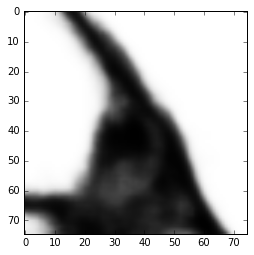

In [13]:
    imshow(e_p[0][0]['prob'],cmap='gray')

In [12]:
e_p[0][0]['prob'].max()

0.99607843